** File Reading **

Here in this notebook, I have illustrated the steps to build a model to classify a image dataset into 4 different classes.

It is observed that the dataset files is in **.pkl** format. Thus we need to import pickle library of python and fetch the data from the files. 

In [0]:
import pickle
with open('train_image.pkl', 'rb') as f:
    train_X = pickle.load(f)                        # train_X stores the raw image data obtained from train_image.pkl file
with open('train_label.pkl', 'rb') as f:
    train_Y = pickle.load(f)                        # train_Y stores the image labels of training set obtained from train_label.pkl file
with open('test_image.pkl', 'rb') as f:
    test_X = pickle.load(f)                         # test_X stores the raw image data of test set obtained from test_image.pkl file

**Importing Required Libraries**

Next, I will be importing all necessary packages for creating a network and preprocessing. I will be using a CNN to classify the images into various classes. The requirement of imported libraries are as follows: 

1.   **Keras** : For building the model.
2.   **Scikit Learn** : For spliting the dataset into training and validation set.
3.   **NumPy** : For handling image matrices.
4. **Pandas** : For handling csv files.
5. **MatPlotLib** : For displaying some images. 



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

**Preprocessing Steps**

We will have to convert the raw image and label data into NumPy arrays. Also, we shall be display one of the pictures from the training dataset.

(8000, 784)


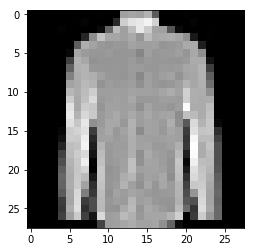

In [55]:
X_orig = np.asarray(train_X, dtype=None, order=None) # Conversion into numpy array
Y_orig = np.asarray(train_Y, dtype=None, order=None) # Conversion into numpy array
print(X_orig.shape)
t = X_orig[6119].reshape(28,28)
plt.imshow(t, cmap="gray")

The following block does quite a few things. 
* Firstly, it converts each of the training example from a vector to 28x28x1 matrix which is required by the convolutional layer of the network as an input. Also, each of the image pixel values are rescaled by dividing by 255. 
* Secondly, it alters the labels. In order to use "categorical crossentropy" loss for multiclass classification, the labels should be in the form of a matrix of size (number of examples, number of classes).  This is done by *to_categorical* method. The number of classes is automatically determined by the maximum value of the label. In this case, since the labels take the values 0, 2, 3 and 6 even though only 4 classes are present. Hence label values are altered in the following way : 0 -> 0 ; 2 -> 1, 3 -> 2, 6 -> 4.
* Finally, the training set and its labels are split into training and validation set. The validation set is made  of 20% of the training set. Scikit-learn function *train_test_split* is used for this purpose.







In [56]:
train_image = []
for i in range(X_orig.shape[0]):                                                             # loop for altering image data
  img = X_orig[i].reshape(28,28,1)
  img = img / 255;
  train_image.append(img)
X1 = np.array(train_image)
for i in range(Y_orig.shape[0]):                                                             # loop for altering labels
  if Y_orig[i] == 2:
    Y_orig[i] = 1
  elif Y_orig[i] == 3:
    Y_orig[i] = 2
  elif Y_orig[i] == 6:
    Y_orig[i] = 3
Y1 = to_categorical(Y_orig,num_classes=4)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state=42, test_size=0.2)   # split into training and validation set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[1090])

(6400, 28, 28, 1)
(1600, 28, 28, 1)
(6400, 4)
(1600, 4)
[0. 1. 0. 0.]


** Network Creation **

Now, the model needs to be defined. For this case, I will be using a Convolutional Neural Network.

In [0]:
def generate_network():
  model = Sequential()                                                                 # make a sequential model
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))    # add a convolutional layer
  model.add(Conv2D(64, (3, 3), activation='relu'))                                    
  model.add(MaxPooling2D(pool_size=(2, 2)))                                            # add maxpooling layer
  model.add(Dropout(0.25))                                                             # set regularization type to dropout to prevent overfitting with drop probability 25%
  model.add(Flatten())                                                                 # changes input from matrix to vectors for feeding it into dense layers
  model.add(Dense(128, activation='relu'))                                             # add a dense layer
  model.add(Dropout(0.5))                                                              # set dropout probability of layer to 50%
  model.add(Dense(4, activation='softmax'))                                            # add dense layer
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) # set loss function as categorical crossentropy 
  return model

** Training the Network **

The following block trains the network on the training data and validates it over validation set.

In [66]:
model  = generate_network()
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 22s 3ms/step - loss: 0.6442 - acc: 0.7445 - val_loss: 0.4708 - val_acc: 0.8106
Epoch 2/15
6400/6400 [==============================] - 21s 3ms/step - loss: 0.4584 - acc: 0.8214 - val_loss: 0.4212 - val_acc: 0.8287
Epoch 3/15
6400/6400 [==============================] - 21s 3ms/step - loss: 0.3975 - acc: 0.8402 - val_loss: 0.3968 - val_acc: 0.8375
Epoch 4/15
6400/6400 [==============================] - 22s 3ms/step - loss: 0.3467 - acc: 0.8623 - val_loss: 0.3895 - val_acc: 0.8438
Epoch 5/15
6400/6400 [==============================] - 21s 3ms/step - loss: 0.3261 - acc: 0.8730 - val_loss: 0.3783 - val_acc: 0.8494
Epoch 6/15
6400/6400 [==============================] - 22s 3ms/step - loss: 0.2991 - acc: 0.8841 - val_loss: 0.3748 - val_acc: 0.8494
Epoch 7/15
6400/6400 [==============================] - 21s 3ms/step - loss: 0.2762 - acc: 0.8931 - val_loss: 0.3794 - val_acc: 0.8450
Epoch 8

**Test data preprocessing **

Now that the model has already been trained, we will use it to predict on test dataset. Before that we need to process the test data in the same way we have done with the training data by rescaling and reshaping.

In [0]:
test_X = np.asarray(test_X, dtype=None, order=None)
test_image = []
for i in range(test_X.shape[0]):
  img = test_X[i].reshape(28,28,1)
  img = img / 255;
  test_image.append(img)
test_X = np.array(test_image)


** Predicting **

The trained model will predict on the test dataset.

In [0]:
prediction = model.predict_classes(test_X)

The classes that the model predicts are 0, 1, 2 and 3 corresponding to the required 0, 2, 3, 6. So the predicted values are adjusted accordingly.

In [0]:
for i in range(len(prediction)):
  if prediction[i]==1:
    prediction[i] = 2
  elif prediction[i] == 2:
    prediction[i] = 3
  elif prediction[i] == 3:
    prediction[i] = 6

** Storing predictions **

The predicted values are now put inside a pandas dataframe in order to facilitate saving to a csv files. The column representing image index values is named "test_image_index" and the column representing predicted classes has name "predicted_class" .

In [69]:
df = pd.DataFrame(prediction)
df.index.name="test_image_index"
df.columns=["predicted class"]
print(df)

                  predicted class
test_image_index                 
0                               0
1                               0
2                               0
3                               0
4                               0
5                               0
6                               0
7                               0
8                               0
9                               0
10                              0
11                              0
12                              0
13                              0
14                              0
15                              0
16                              0
17                              0
18                              0
19                              0
20                              0
21                              0
22                              0
23                              0
24                              0
25                              0
26                              0
27            

The created dataframe is now saved as a **.csv** file with name "Tryambak Bhattacharjee.csv"

In [0]:
df.to_csv('Tryambak Bhattacharjee.csv')